In [2]:
from keras.datasets.cifar10 import load_data
(x_test,y_test),(x_train,y_train)=load_data()



170498071/170498071 [==============================] - 2s 0us/step


In [3]:


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [4]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)


In [5]:
trans=['airplane','caar','bird','cat','deer','dog','frog','horse','ship','truck']

dog


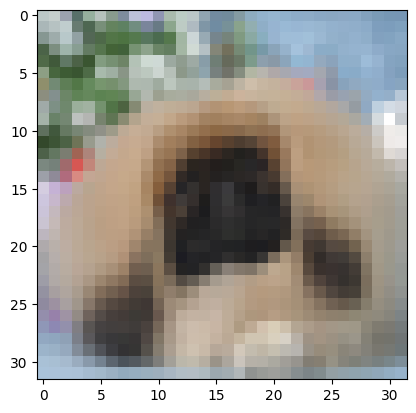

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
idx=250
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [8]:
#x:0-1
#y:配合loss這邊做sparse一>這樣就不用另外做one-hot(這功能直接告訴一>這樣就不用另外做one-hot(标签必须是一个整数数组，其中每个整数都代表一个类别)
x_train_norm=x_train/255
x_test_norm=x_test/255


In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy'],
        optimizer='adam')

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)#validation loss 在 5 個 epoch 內沒有改善時，就會觸發 EarlyStopping 提前終止訓練的機制
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
90/90 [==============================] - 16s 23ms/step - loss: 2.0161 - accuracy: 0.2431 - val_loss: 1.6803 - val_accuracy: 0.3890
Epoch 2/40
90/90 [==============================] - 2s 17ms/step - loss: 1.6144 - accuracy: 0.4034 - val_loss: 1.5513 - val_accuracy: 0.4340
Epoch 3/40
90/90 [==============================] - 1s 16ms/step - loss: 1.4529 - accuracy: 0.4673 - val_loss: 1.3750 - val_accuracy: 0.4910
Epoch 4/40
90/90 [==============================] - 2s 18ms/step - loss: 1.3101 - accuracy: 0.5213 - val_loss: 1.2773 - val_accuracy: 0.5240
Epoch 5/40
90/90 [==============================] - 1s 14ms/step - loss: 1.2096 - accuracy: 0.5620 - val_loss: 1.2363 - val_accuracy: 0.5360
Epoch 6/40
90/90 [==============================] - 1s 11ms/step - loss: 1.1103 - accuracy: 0.6014 - val_loss: 1.1588 - val_accuracy: 0.5670
Epoch 7/40
90/90 [==============================] - 1s 13ms/step - loss: 1.0163 - accuracy: 0.6327 - val_loss: 1.1581 - val_accuracy: 0.5690
Epoch 8/40
9

In [11]:
model.evaluate(x_test_norm,y_test)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.0535 - accuracy: 0.6437


[1.0535407066345215, 0.6436799764633179]

In [12]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])
     

1563/1563 [==============================] - 3s 2ms/step


,airplane(pred),caar(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),2839,191,325,244,327,52,51,60,783,128
caar(true),65,4004,16,124,36,19,57,18,405,256
bird(true),181,44,2498,514,804,383,329,123,102,22
cat(true),30,32,248,2750,424,955,329,113,92,27
deer(true),62,32,298,406,3378,187,300,264,60,13
dog(true),15,36,230,1099,420,2786,182,174,41,17
frog(true),16,60,208,580,376,125,3577,19,29,10
horse(true),25,69,104,371,736,386,36,3181,48,44
ship(true),173,117,59,153,102,59,40,18,4217,62
truck(true),94,1015,25,295,57,51,90,86,333,2954


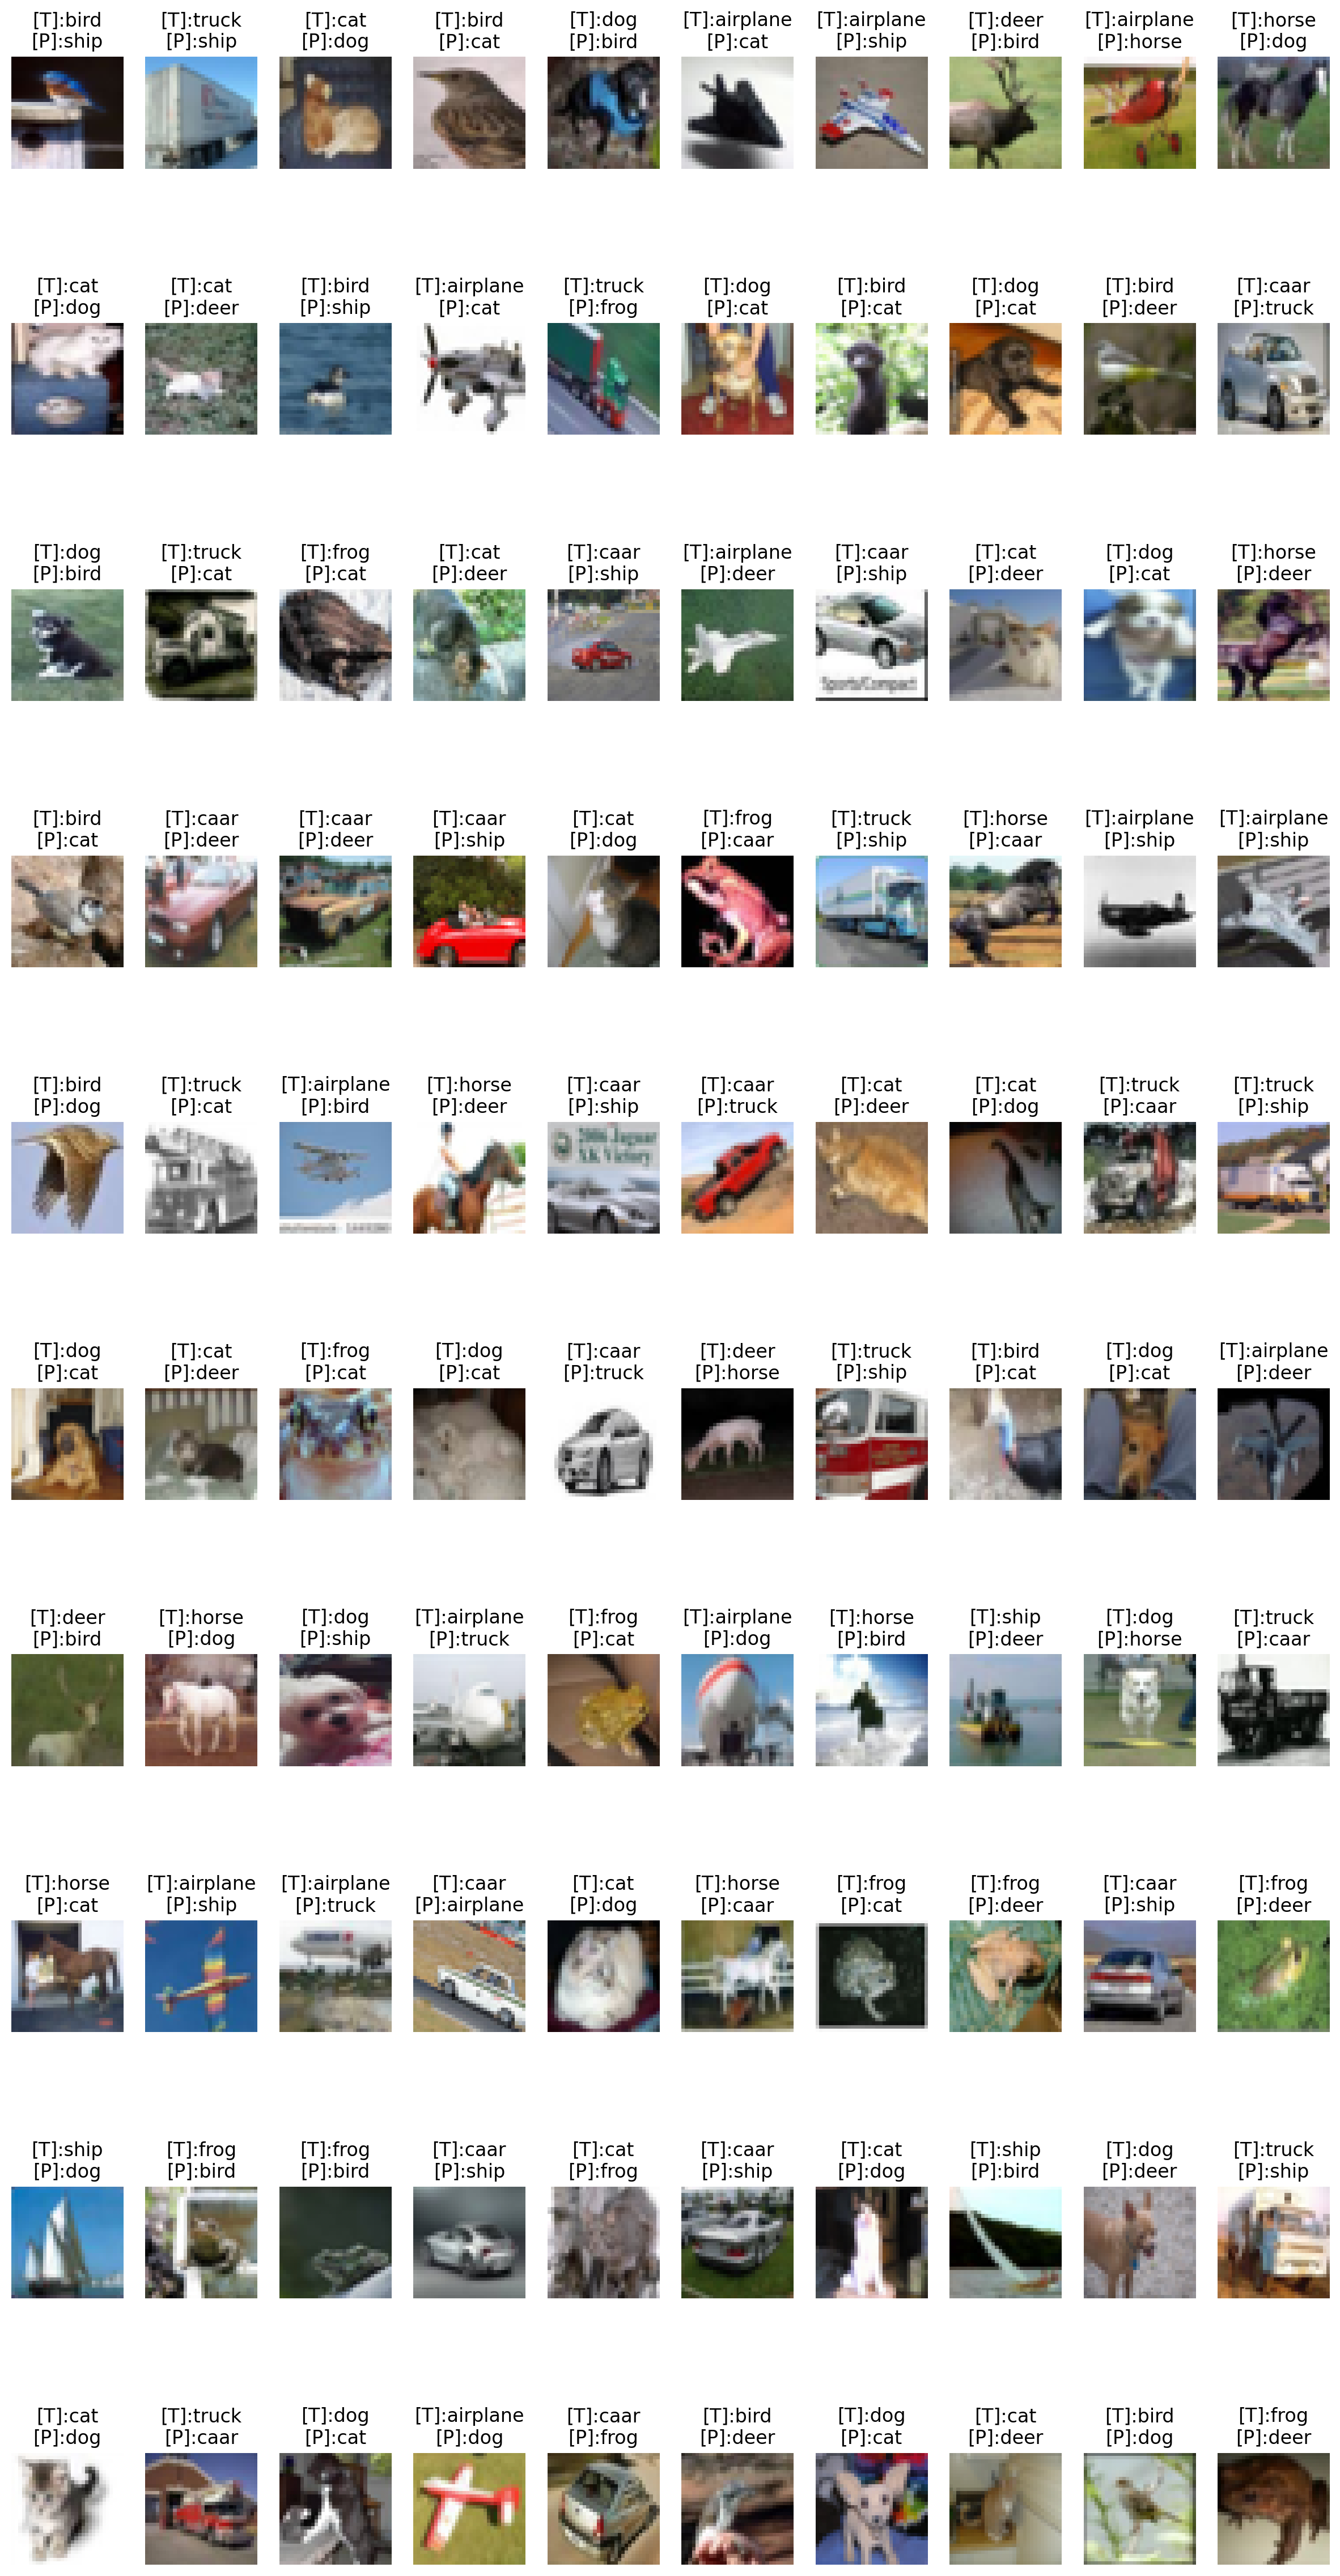

In [13]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.font_family = 'Microsoft YaHei'
import warnings
warnings.filterwarnings('ignore')
import numpy as np


#這種情況通常出現在需要選取某些條件下的資料時，例如預測錯誤的樣本索引
idx = np.nonzero(y_test != pre)[0]  #我們可以使用 np.nonzero() 函式找出布林陣列中所有非零元素的索引位置，以避免選取到預測正確的樣本
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):  #len(idx) 就代表預測錯誤的樣本數量
    plt.subplot(10, 10, i+1)  #如果不加 i+1，每個子圖的位置都會是 0，也就是全部疊在一起
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])
     

stream=True 是 requests.get() 的一個參數，當這個參數設為 True 時，會啟用串流下載模式，也就是說當下載的資料量非常大時，會透過串流方式一邊下載一邊處理，可以減少記憶體的使用量。在這個程式碼中，使用 stream=True 的目的是為了下載圖片時不會把整張圖片直接讀進記憶體，而是透過串流方式下載圖片的部分資料，直到需要使用時才把該部分資料讀進記憶體中。

In [17]:
print(testx.shape)

(1, 32, 32, 3)


1/1 [==============================] - 0s 179ms/step
airplane 的機率是: 0.9815
caar 的機率是: 0.0
bird 的機率是: 0.008
cat 的機率是: 1e-04
deer 的機率是: 0.0023
dog 的機率是: 1e-04
frog 的機率是: 0.0
horse 的機率是: 0.0
ship 的機率是: 0.0079
truck 的機率是: 0.0
最高機率是: airplane


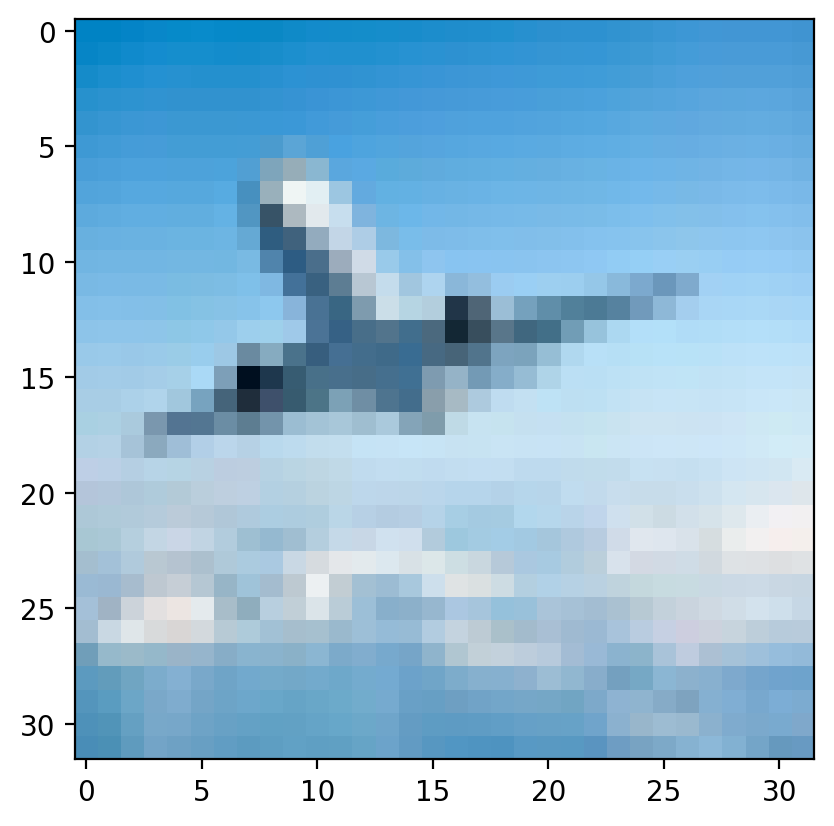

In [14]:
import requests
import numpy as np
from PIL import Image
url = "https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcSkMfPWkdk8H9MfuvrUmAmJZsxYdZ-BwNnQAXGrI7nO_GhfICmdlDaYR2YLj5pzI5Uvrya44rnhyMFyJU6qyA&s=19" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)
     
     

1/1 [==============================] - 0s 76ms/step


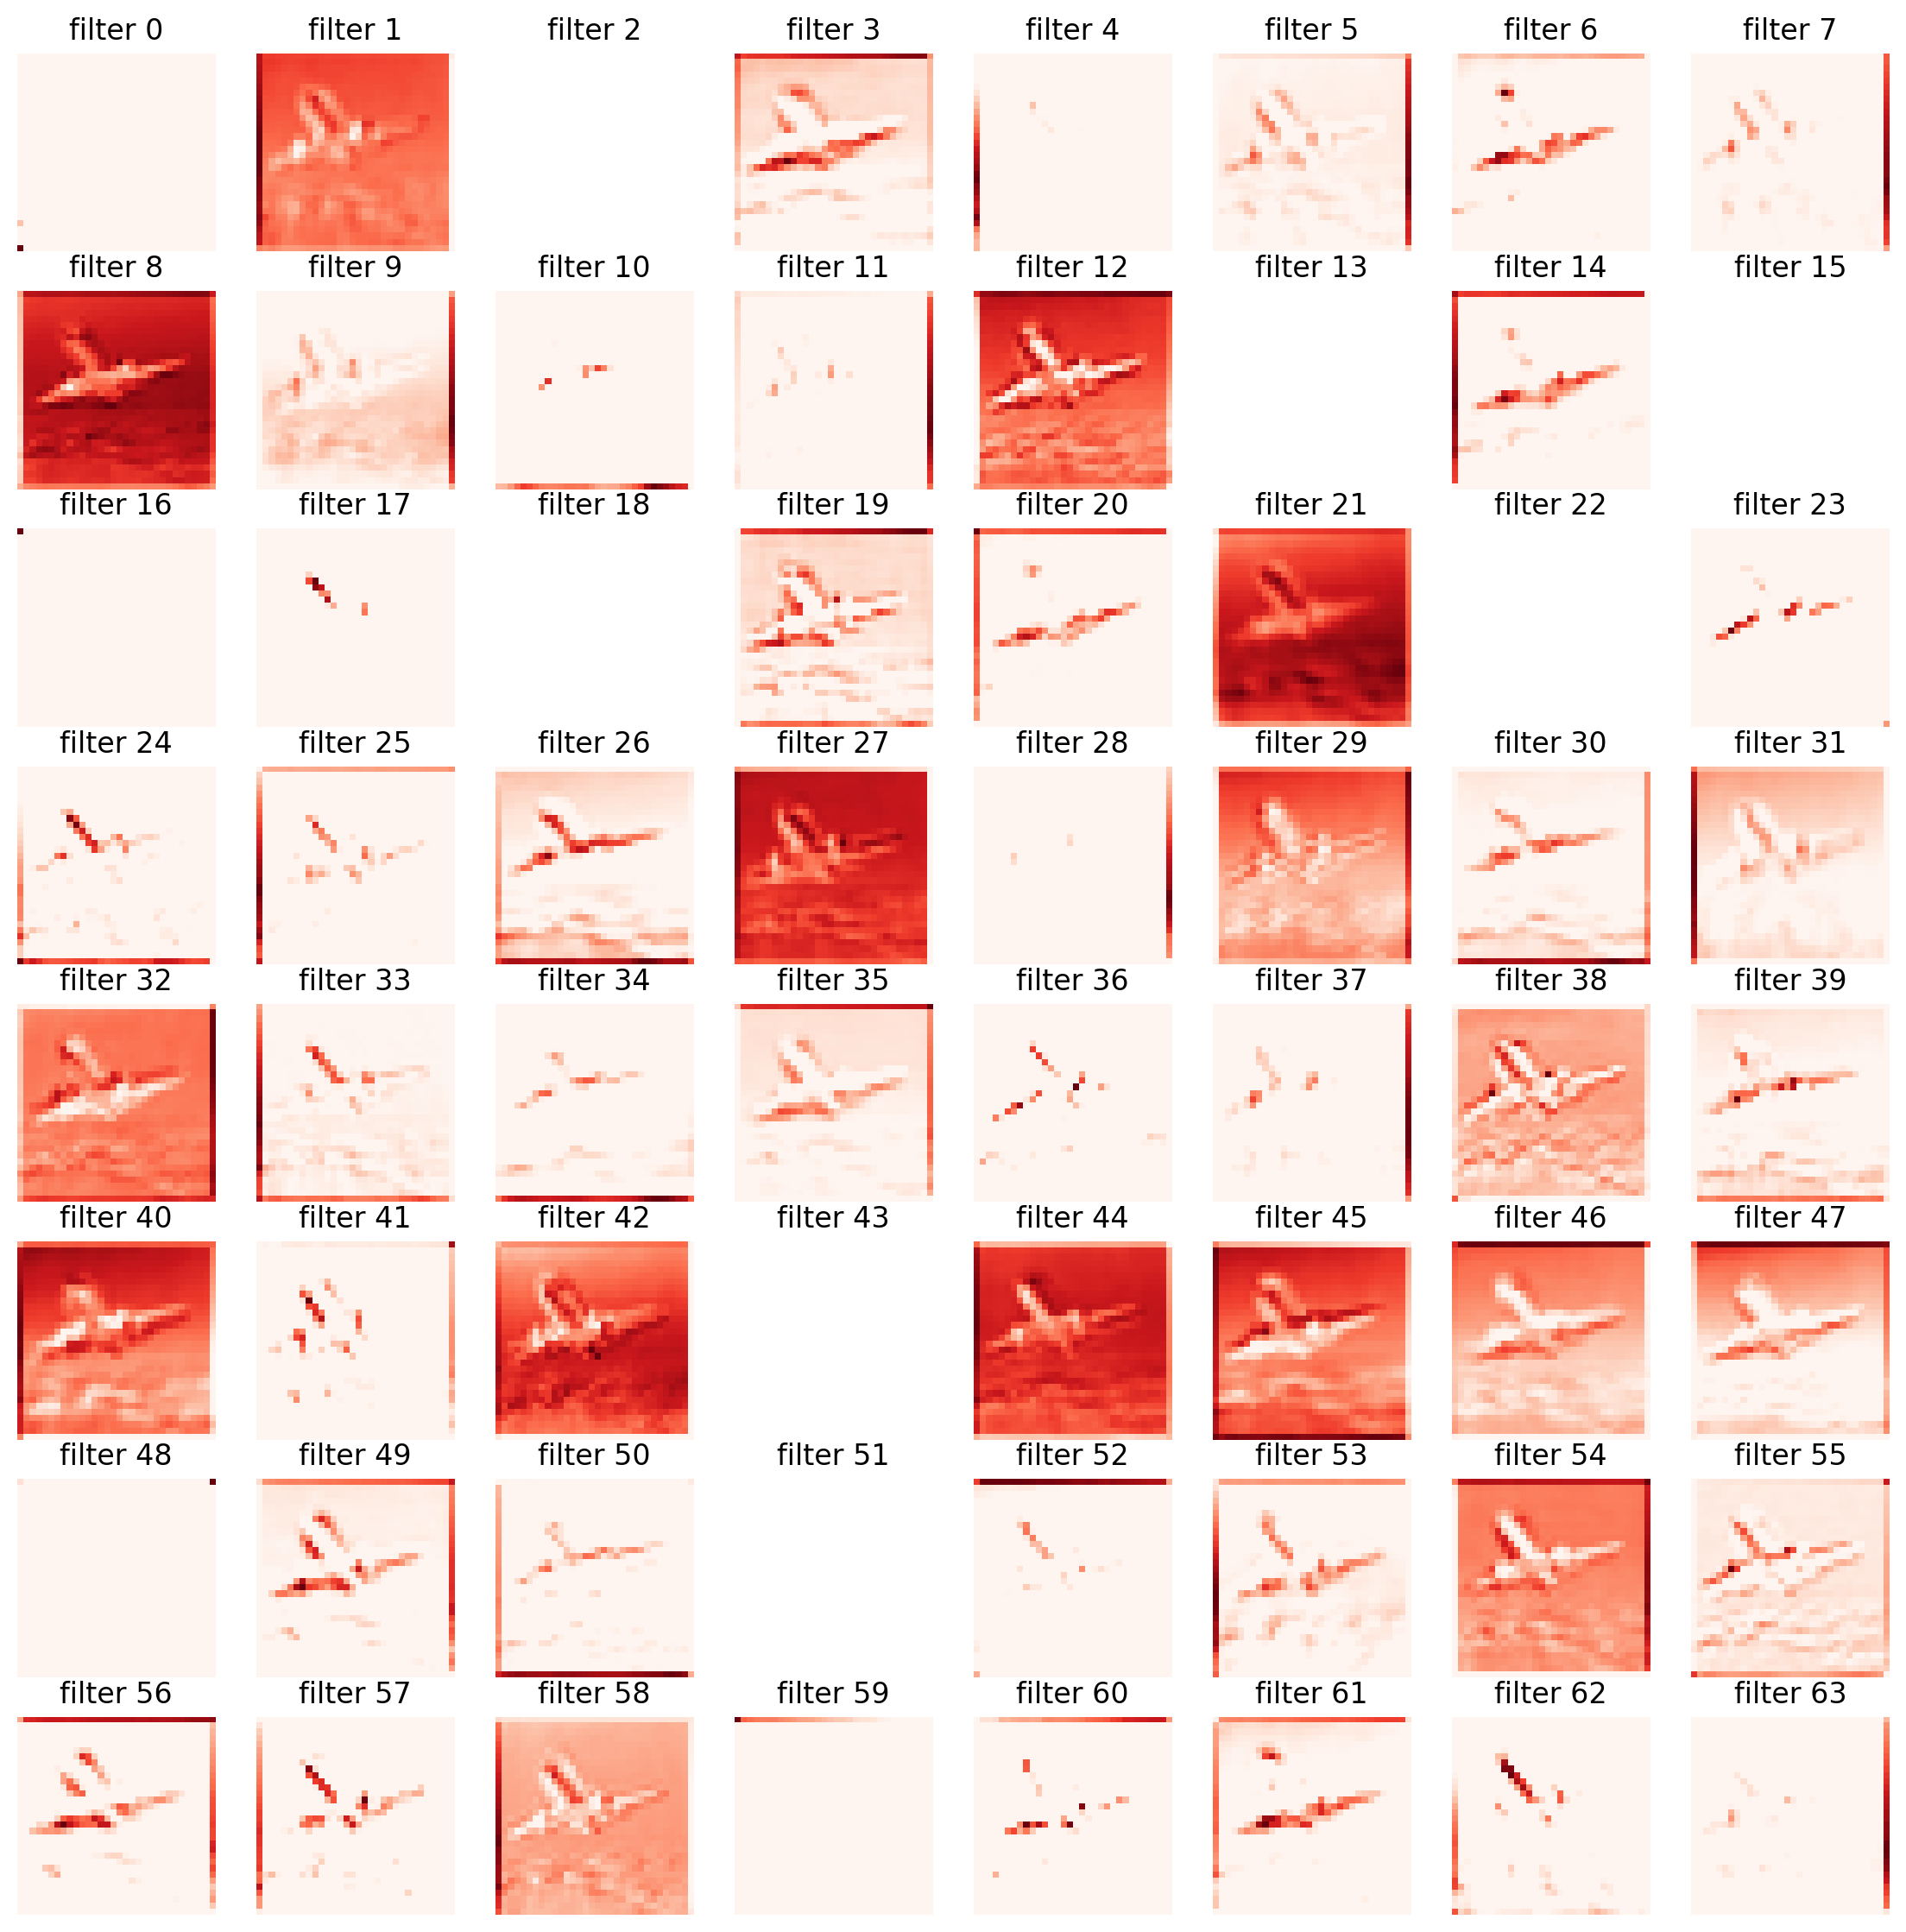

In [15]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
#通常在使用 Keras 模型進行預測時，需要輸入的資料形狀必須是 (樣本數, 圖片高度, 圖片寬度, 色彩通道數) 的形式
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    #這行程式碼是從conv張量中取出第i個卷積核的運算結果（一個二維的特徵圖），並將其存儲在名為fil的變量中,這行程式碼的目的是從conv張量中提取一個特定的特徵圖，以便後續的視覺化和分析。
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.e(title)
    plt.axis("oftitlf")
    plt.imshow(fil, cmap="Reds")

In [ ]:
# HDFVIEW
#　讀取
import os
from tensorflow.keras.models import load_model
temp = load_model("cnn.h5")
temp.evaluate(x_test_norm, y_test)
# 儲存
model.save("cnn.h5")
# 有的話就讀, 沒有的話就建立模型
if not os.path.exists("cnn.h5"):
    # model = Sequential(layers)
    # model.compile(loss=xxx)
    pass
else:
    model = load_model("cnn.h5") 